# Dataset Description

## Overview
This dataset is designed for object detection tasks and contains images of various objects categorized into 15 different classes. The dataset is split into training, validation sets, making it suitable for training and evaluating machine learning models, particularly those focused on object detection.

## Data Split
- Training Data: Located in the `../train/images` directory, this set is used to train and fine-tune machine learning models.
- Validation Data: Located in the `../valid/images` directory, this set helps in tuning hyperparameters and monitoring the model's performance during training.

## Number of Classes (nc)
There are 15 distinct object classes in this dataset, and the models are expected to detect and classify these objects. The classes are as follows:
1. Bicycle
2. Bike
3. Boat
4. Bus
5. Car
6. CNG (Compressed Natural Gas vehicle)
7. Easybike
8. Horsecart
9. Launch
10. Leguna
11. Rickshaw
12. Tractor
13. Truck
14. Van
15. Wheelbarrow

## Use Case
This dataset is valuable for various applications, including but not limited to:
- Object detection and classification
- Traffic monitoring and management
- Transportation and vehicle tracking
- Urban planning and analysis
- Environmental monitoring

## Dataset Size
The specific number of images and objects in each class within the dataset may vary. Proper data augmentation techniques should be applied to ensure that the model generalizes well across all classes.

# Loading Images from the Train Folder

In this section, we'll discuss how to load images from a train folder for use in machine learning or computer vision tasks. Typically, you'd use a library like Python's `PIL` (Pillow) , `cv2`  or  a machine learning framework like TensorFlow or PyTorch to load and preprocess the images.

## Step 1: Import Required Libraries

First, import the necessary libraries. In this example, we'll use `PIL` (Pillow) for image loading and `os` for file `matplotlib` operations.


In [30]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

def display_images(image_paths, num_images=18, title=None):
    """
    Display a set of random images from a list of file paths in a grid.
    
    Args:
        image_paths (list): List of file paths to the images.
        num_images (int, optional): Number of random images to display (default is 12).
        title (str, optional): Title for the plot (default is None).
    """
    random_choice = random.sample(image_paths, num_images)

    fig, axes = plt.subplots(3, 6, figsize=(12, 8))
    fig.subplots_adjust(hspace=0.5)
    
    if title:
        fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axes.flat):
        image_path = random_choice[i]

        with Image.open(image_path) as img:
            ax.imshow(img)
            ax.axis('off')

    plt.show()

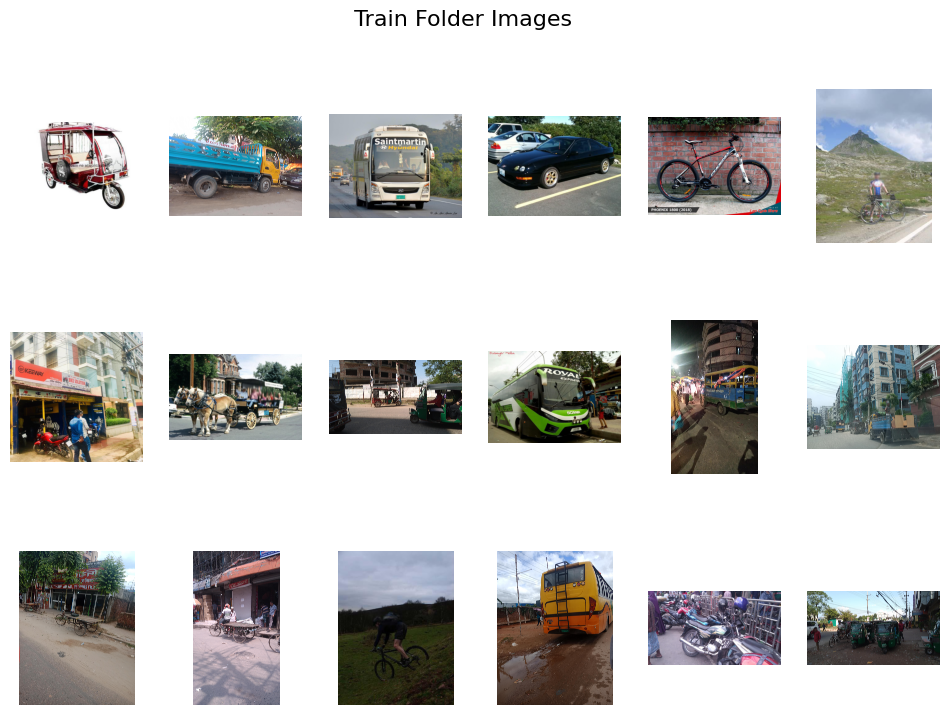

In [31]:
    
train_folder = r"C:\Users\koti0\OneDrive\Desktop\cuda\Vehicles.v2-v1.yolov8\train\images"

# Get a list of image file names in the folder
image_files = [os.path.join(train_folder, f) for f in os.listdir(train_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

display_images(image_files, title=" Train Folder Images")

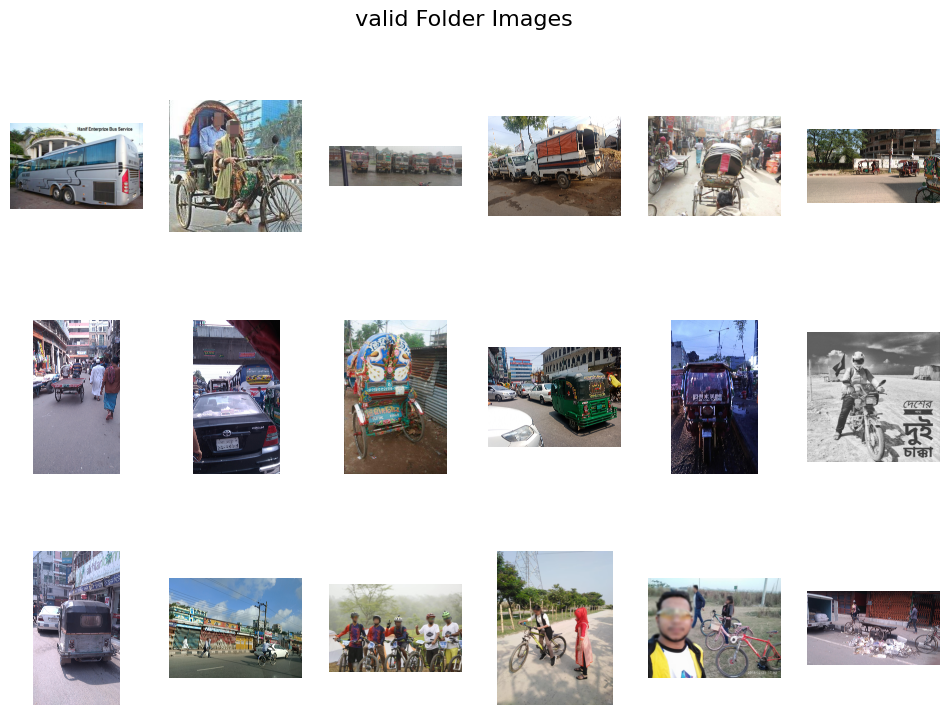

In [33]:
valid_folder = r"C:\Users\koti0\OneDrive\Desktop\cuda\Vehicles.v2-v1.yolov8\valid\images"

# Get a list of image file names in the folder
image_files = [os.path.join(valid_folder, f) for f in os.listdir(valid_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

display_images(image_files, title=" valid Folder Images")

## YOLO (You Only Look Once) Model:

YOLO (You Only Look Once) is a real-time object detection system that is widely used in various computer vision applications. 
It was introduced by Joseph Redmon and Ali Farhadi in 2016. 
YOLOv8 is the latest version of the YOLO model, which includes several improvements and advancements over its previous versions.

The YOLOv8 model uses a single neural network to predict bounding boxes and class probabilities directly from full images. It does not require any pre-processing or feature extraction, making it very fast and efficient. YOLOv8 uses a concept called anchor boxes, which are predefined boxes of different sizes and aspect ratios that are placed on top of each other in a grid-like pattern. Each anchor box is associated with a set of weights that are learned during training, which help to predict the class probabilities and bounding box coordinates.

### The YOLOv8 model consists of three main components:

**Anchors:** Anchors are the predefined boxes that are placed on top of each other in a grid-like pattern. Each anchor box has a unique set of weights that are learned during training.


**Convolutional Layers:** YOLOv8 uses multiple convolutional layers to extract features from the input image. These layers help to extract the information needed to classify objects and predict their bounding boxes.

**FPN (Feature Pyramid Network):** FPN is a feature pyramid network that is used to extract features from different scales. It helps to improve the performance of the model by providing a rich set of features that can be used to detect objects at different distances.
Advantages of YOLOv8:

YOLOv8 has several advantages that make it a popular choice for object detection and tracking:

**Real-time Performance:** YOLOv8 is designed for real-time object detection, making it very fast and efficient. It can process 4K videos at 30 frames per second on a single GPU.

**High Accuracy:** YOLOv8 has high accuracy and can detect objects with a high degree of precision. It achieves high mAP (mean Average Precision) scores on several benchmark datasets.

**Instance Segmentation:** YOLOv8 can perform instance segmentation, which means that it can segment each object instance separately, even if they are overlapping or have similar appearances.

**Multi-Class Detection:** YOLOv8 can detect multiple object classes simultaneously, making it a versatile model for various computer vision applications.

**Easy to Implement:** YOLOv8 is relatively easy to implement, and there are several open-source libraries and frameworks available that make it easier to integrate with different applications.

![Sample Image](yolov8_architecture.jpg)


In [7]:

from ultralytics import YOLO
import cv2
from comet_ml import Experiment


# using yolov8n.pt model for fine tuning
model=YOLO("yolov8l.pt")



experiment = Experiment(
  api_key="mbKrMJHnY1Ap4wpBiB87T6jyr",
  project_name="yolov8",
  workspace="koti-malla"
)

model.train(data=r"C:\Users\koti0\OneDrive\Desktop\cuda\Vehicles.v2-v1.yolov8\data.yaml", epochs=20, imgsz=640,device="0")

100%|██████████| 83.7M/83.7M [00:06<00:00, 14.6MB/s]
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/koti-malla/yolov8/80750bb711a6412a886ccc808f14023c

Ultralytics YOLOv8.0.187 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a166a061bd0>
fitness: 0.6198844209333264
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.59401,      0.5961,     0.23098,     0.64719,     0.61366,     0.67289,     0.71315,     0.67009,      0.3506,     0.75767,     0.57162,     0.59628,     0.71167,     0.66962,     0.54874])
names: {0: 'bicycle', 1: 'bike', 2: 'boat', 3: 'bus', 4: 'car', 5: 'cng', 6: 'easybike', 7: 'horsecart', 8: 'launch', 9: 'leguna', 10: 'rickshaw', 11: 'tractor', 12: 'truck', 13: 'van', 14: 'wheelbarrow'}
plot: True
results_dict: {'metrics/precision(B)': 0.815967129772243, 'metrics/recall(B)': 0.776724525585381, 'metrics/mAP50(B)': 0.8322818921959998, 'metrics/mAP50-95(B)': 0.596284701904140

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_image(image_path, title=None):
    """
    Display an image using matplotlib.

    Parameters:
    - image_path (str): Path to the image file.
    - title (str, optional): Title to be displayed above the image. Default is "Image".
    """
    # Load the image
    img = mpimg.imread(image_path)

    # Display the image with the specified title
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.title(title)
    plt.show()


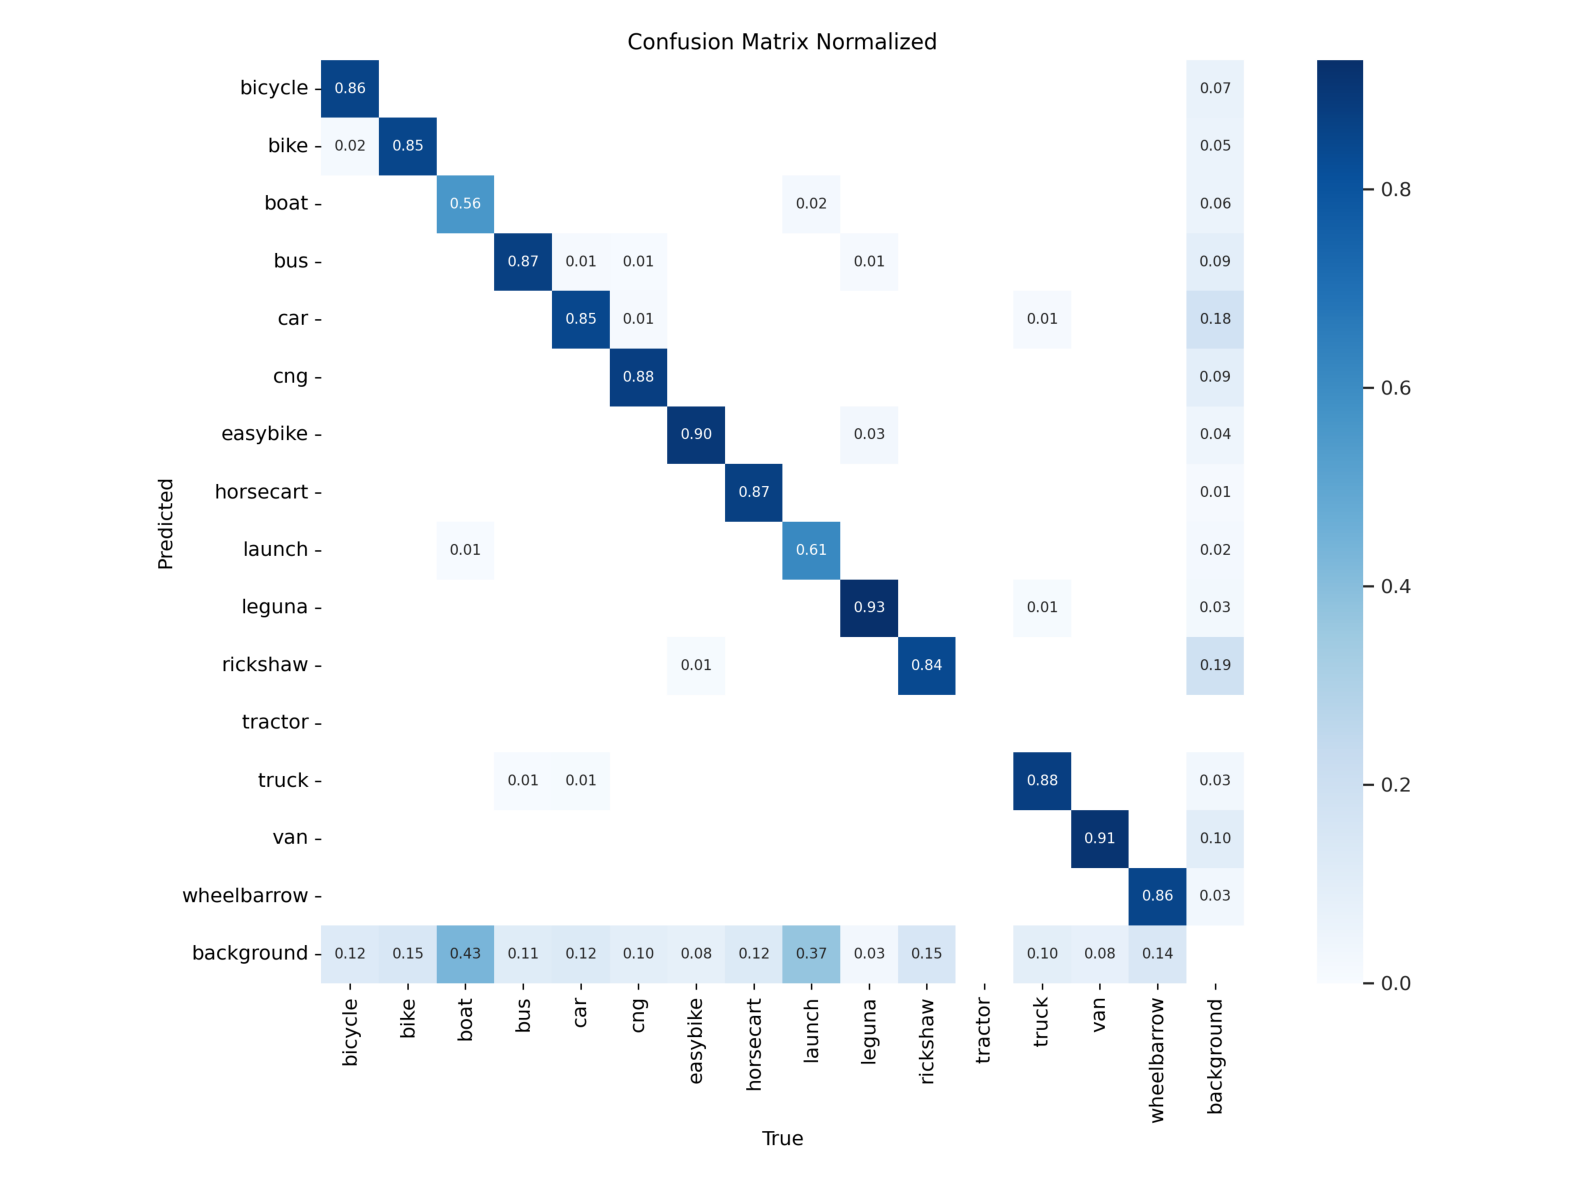

In [14]:
display_image(r"C:\Users\koti0\OneDrive\Desktop\cuda\runs\confusion_matrix_normalized.png")

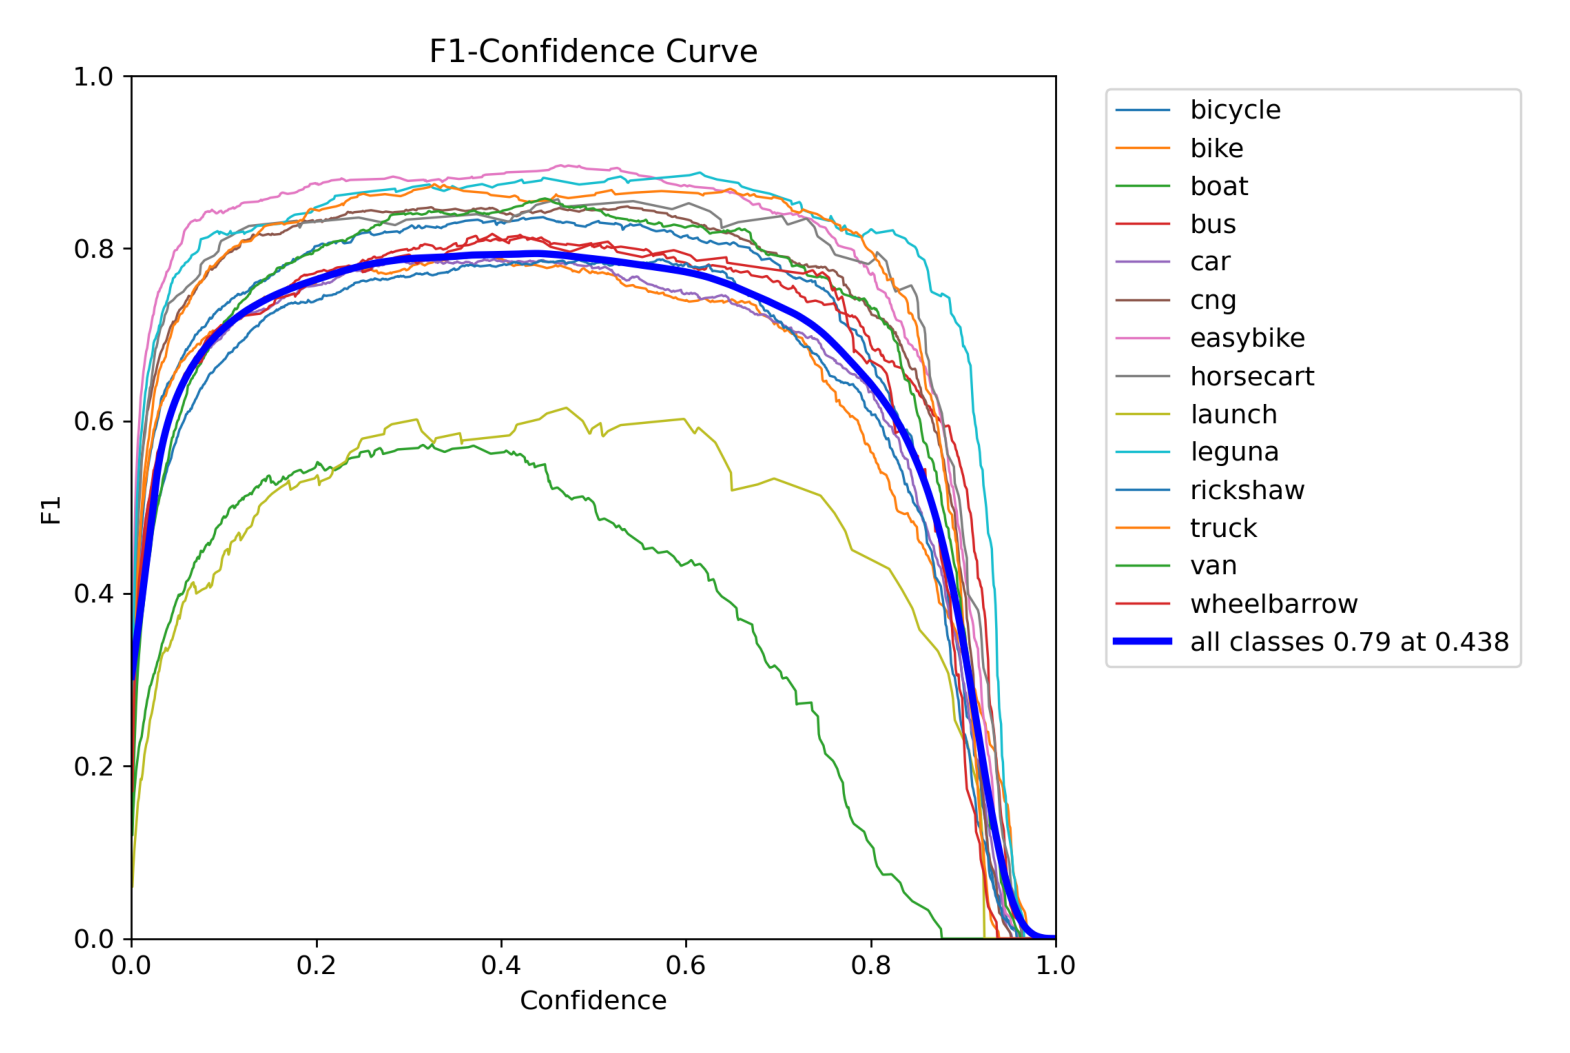

In [13]:
display_image(r"C:\Users\koti0\OneDrive\Desktop\cuda\runs\F1_curve.png")

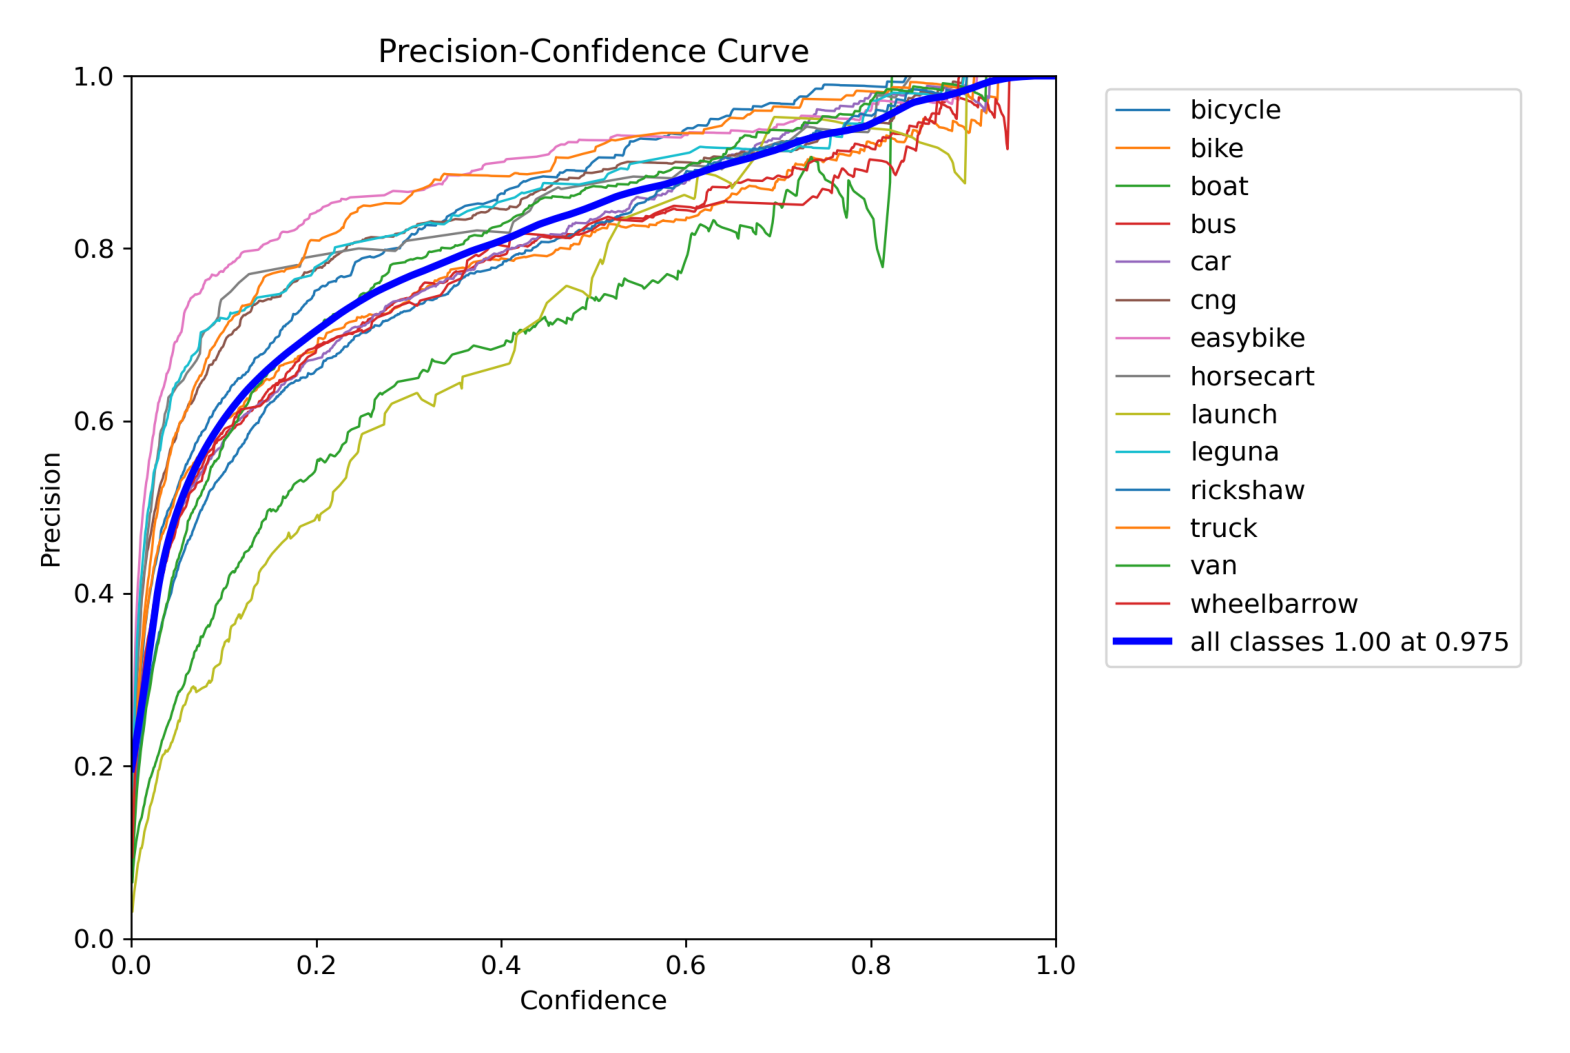

In [15]:
display_image(r"C:\Users\koti0\OneDrive\Desktop\cuda\runs\P_curve.png")

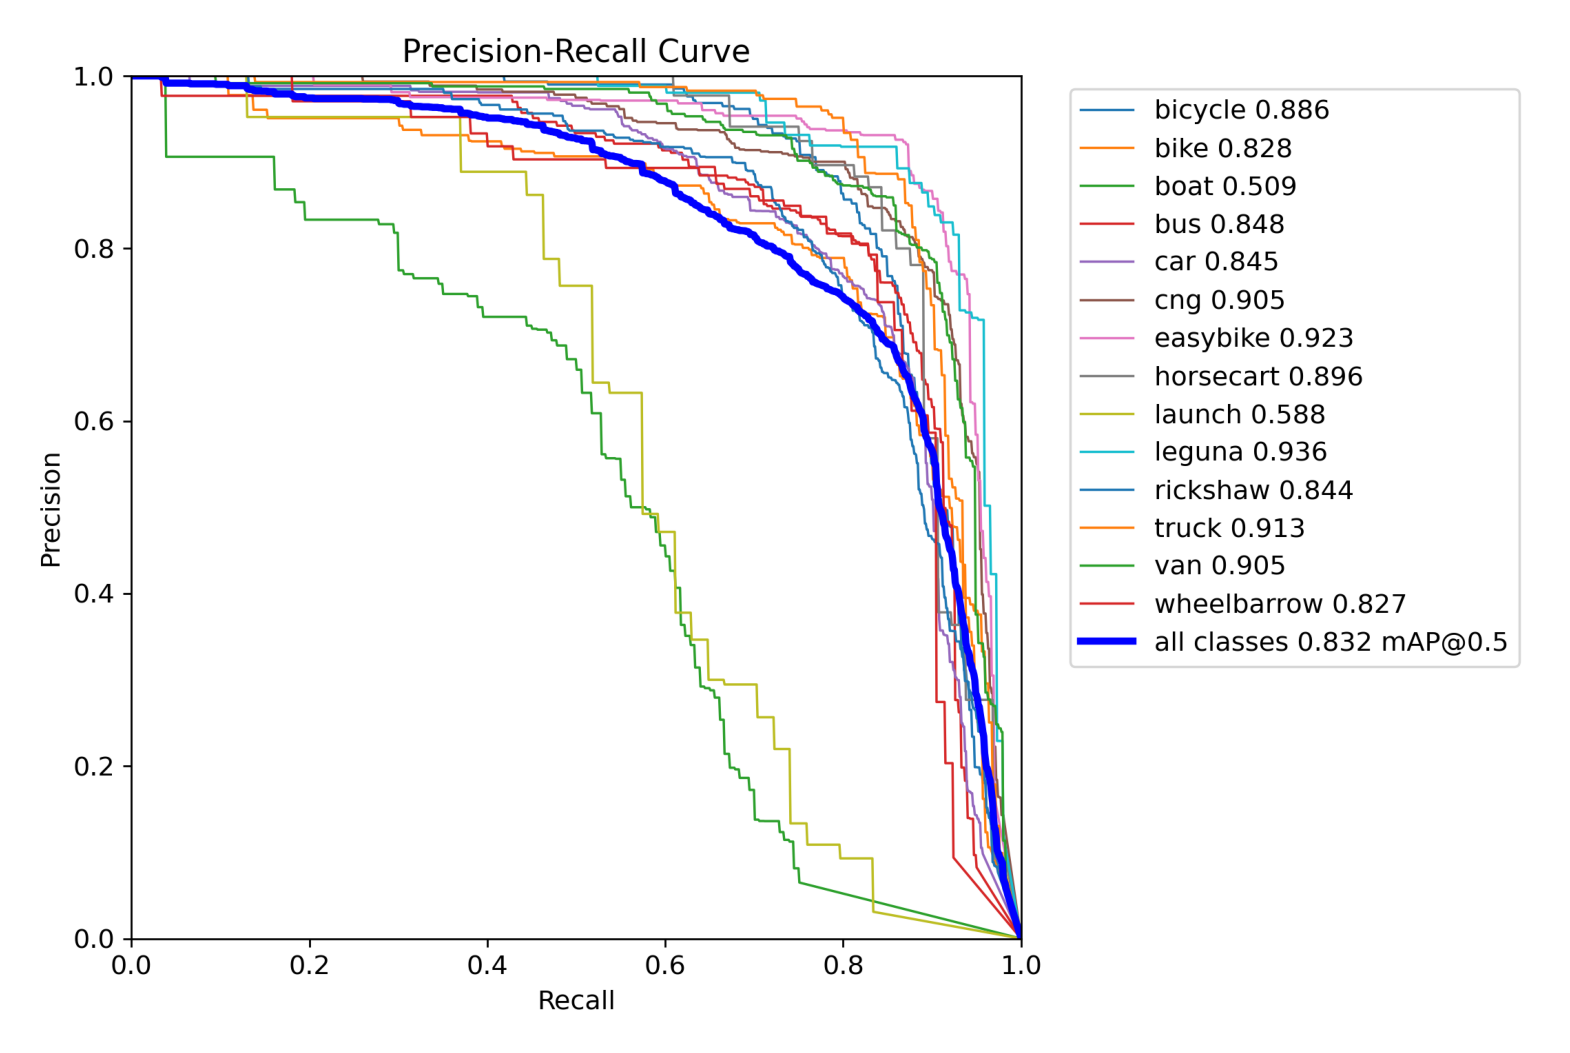

In [16]:
display_image(r"C:\Users\koti0\OneDrive\Desktop\cuda\runs\PR_curve.png")

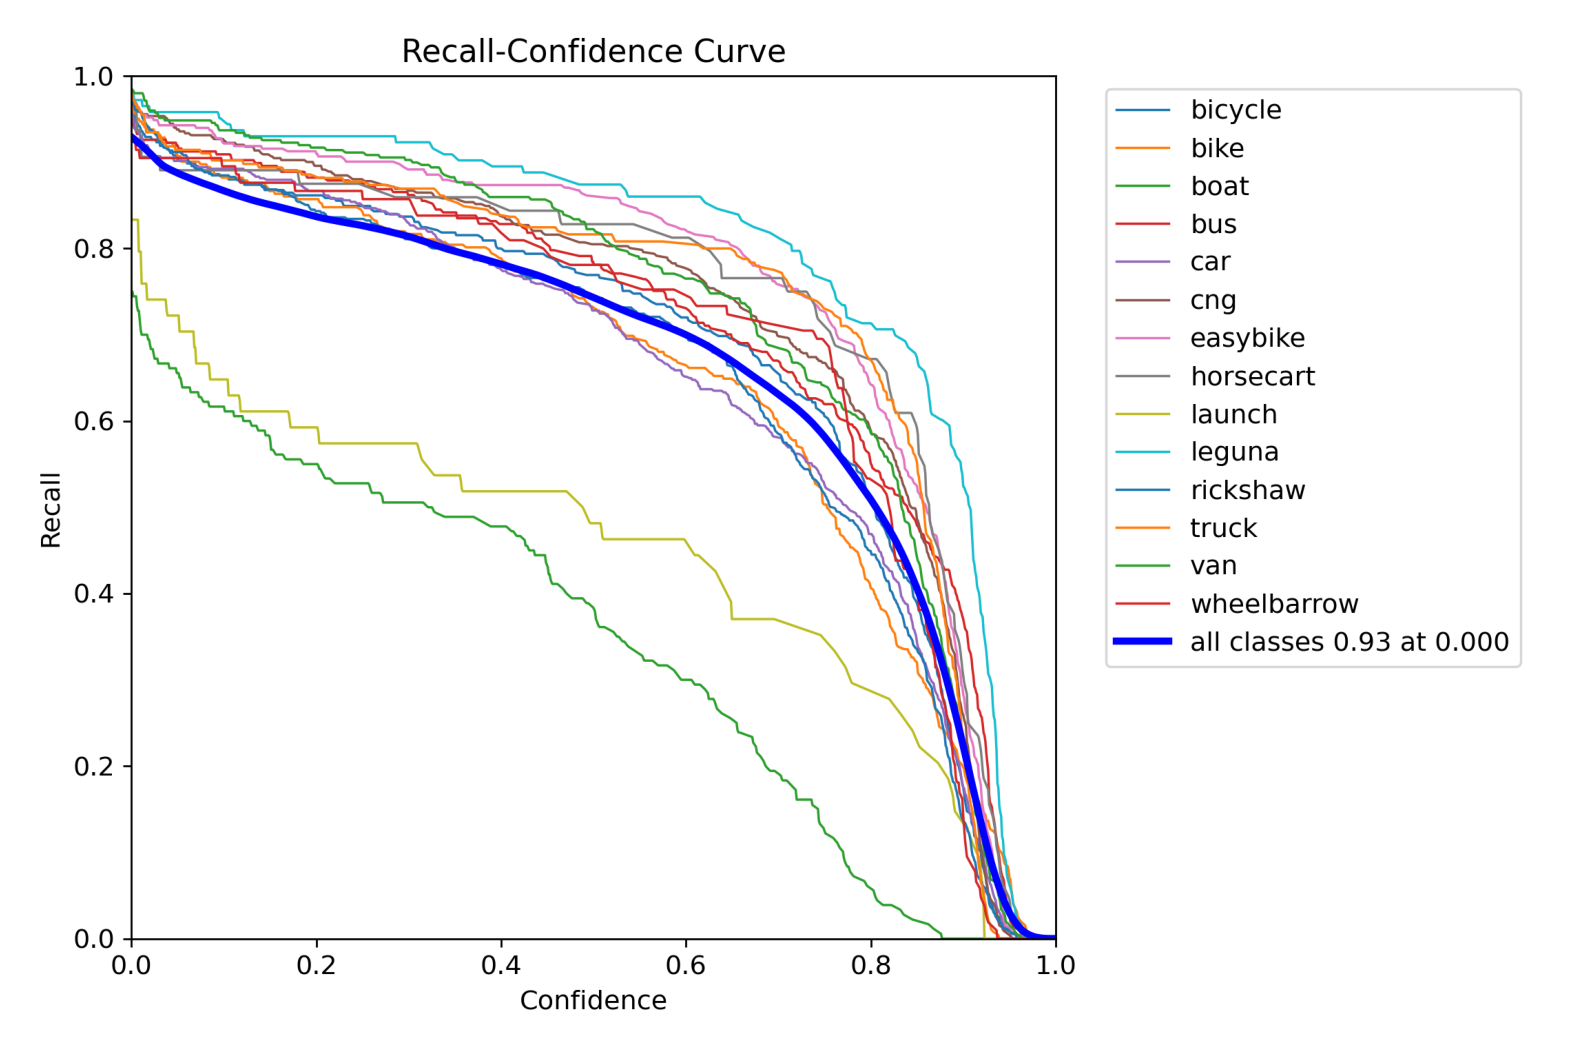

In [17]:
display_image(r"C:\Users\koti0\OneDrive\Desktop\cuda\runs\R_curve.png")

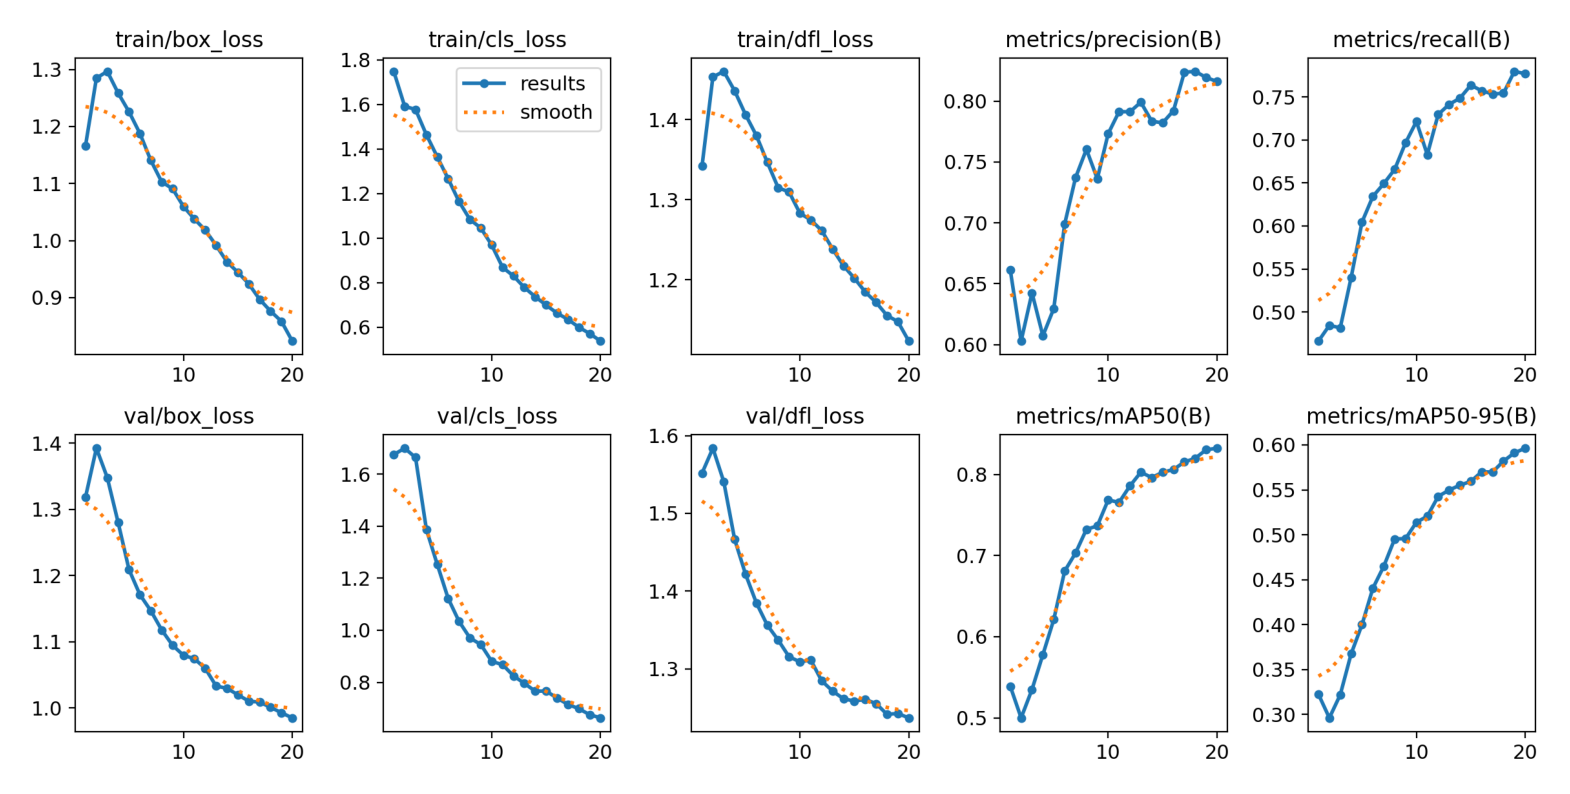

In [18]:
display_image(r"C:\Users\koti0\OneDrive\Desktop\cuda\runs\results.png")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import shutil

# Define the source folder or file path in Colab
source_path = "/content/runs"  # Change this to the folder you want to upload

# Define the destination folder path in your Google Drive
destination_path = "/content/drive/MyDrive/runs_vehicle_object_detection/runs"  # Change this to your desired Drive path

# Copy the folder or file to your Google Drive
shutil.copytree(source_path, destination_path)


'/content/drive/MyDrive/runs_vehicle_object_detection/runs'